<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Description
This project uses the [consumer complaint database](https://catalog.data.gov/dataset/consumer-complaint-database).

## Data Description
The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily.

## Purpose
Classify consumer complaints into predefined categories.

Classification algorithms
- Linear Support Vector Machine (LinearSVM)
- Multinomial Naive Bayes 
- Logistic Regression.

# Business Problem

<div class="alert alert-block alert-success">
<b>Business Problem:</b>  <br>
Task &nbsp;&nbsp; : Find the category of given complaint. <br>
Metric : IF-IDF <br>
Cleaning: Remove punctuations, expand contractions, etc <br>
Question: Which class the given complaint belongs to?
</div>

oad the serialized object make sure you have the 
same conda environment as it was when creating the serialized object.
</div>


**Term Frequency** : This gives how often a given word appears within a document.

$\mathrm{TF}=\frac{\text { Number of times the term appears in the doc }}{\text { Total number of words in the doc }}$

**Inverse Document Frequency**: This gives how often the word appers across the documents.
If a term is very common among documents (e.g., “the”, “a”, “is”),
then we have low IDF score.

$\mathrm{IDF}=\ln \left(\frac{\text { Number of docs }}{\text { Number docs the term appears in }}\right)$

**Term Frequency – Inverse Document Frequency TF-IDF**: 
TF-IDF is the product of the TF and IDF scores of the term.

$\mathrm{TF}-\mathrm{IDF}=\frac{\mathrm{TF}}{\mathrm{IDF}}$


In machine learning, TF-IDF is obtained from the class `TfidfVectorizer`.
It has following parameters:

- `min_df`: remove the words from the vocabulary which have occurred in less than "min_df"
number of files.
- `max_df`: remove the words from the vocabulary which have occurred in more than _{ maxdf" }
total number of files in corpus.
- `sublinear_tf`: set to True to scale the term frequency in logarithmic scale.
- `stop_words`: remove the predefined stop words in 'english':
- `use_idf`: weight factor must use inverse document frequency.
- `ngram_range`: (1,2) to indicate that unigrams and bigrams will be considered.

# Imports

In [38]:
import time
time_start_notebook = time.time()

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot') 

# random state
SEED=100

In [40]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

In [42]:
import sklearn
import tqdm

[(x.__name__,x.__version__) for x in 
 [np,pd,sns,sklearn,tqdm,nltk]]

[('numpy', '1.18.4'),
 ('pandas', '1.0.3'),
 ('seaborn', '0.9.0'),
 ('sklearn', '0.23.0'),
 ('tqdm', '4.46.0'),
 ('nltk', '3.2.5')]

In [43]:
pd.options.display.max_colwidth = None

# Useful Scripts

In [53]:
def add_text_barplot(ax, decimals=4, rot=30,percent=False,comma=False):
    assert hasattr(ax,'patches')
    for p in ax.patches:
        txt = f"{p.get_height():,.2f}"
        txt = np.round(p.get_height(), decimals=decimals)
        
        if comma:
            if (int(txt)==txt):
                txt = "{:,}".format(int(txt))
            else:
                txt = "{:,.2f}".format(txt)
        
        txt = str(txt) + '%' if percent else txt
        x = p.get_x()+p.get_width()/2.
        y = p.get_height()
        ax.annotate(txt, (x,y), ha='center', va='center', 
                xytext=(0, 10), rotation=rot,textcoords='offset points')

# Load the data

In [54]:
df = pd.read_csv('../data/data_clean.csv')
df.head(1).append(df.tail(1))

,product,complaint,category_id,complaint_lst,complaint_clean
0,Mortgage,"Hello : ditech.com is my mortgage company. They placed an automatic forbearance on my account and removed my auto payment after Hurricane Irma. I called about a week after the storm to ask that they remove the forbearance and return the auto payment. This was confirm by the agent and recorded by them. I received a letter just a few weeks ago stating that my auto payment was never returned and the agent who I spoke with after I received the letter actually read back the notes confirming that I called and asked to have forbearance removed and auto payment reinstated. So I asked again the agent to remove the forbearance and install auto payment. \n\nI called this past week to check if this was done yet, and the agent at that time said I still have a forbearance and no auto payment. \n\nAs I right this complaint, I spoke with an agent today that informs me that I dont have auto payment and forbearance is still active. She placed me on hold, which has lasted an hour. \n\nDitech is not responsive, and it is purposely choosing to keep my in forbearance when I have asked countless times to remove me. I also have asked countless times to reinstate auto payment and yet they choose not to listen. \n\nPlease help XXXX XXXX, XXXX",0,"['helo', 'ditechcom', 'mortgage', 'company', 'placed', 'automatic', 'forbearance', 'acount', 'removed', 'auto', 'payment', 'huricane', 'irma', 'caled', 'wek', 'storm', 'ask', 'remove', 'forbearance', 'return', 'auto', 'payment', 'confirm', 'agent', 'recorded', 'received', 'leter', 'weks', 'ago', 'stating', 'auto', 'payment', 'never', 'returned', 'agent', 'spoke', 'received', 'leter', 'actualy', 'read', 'back', 'note', 'confirming', 'caled', 'asked', 'forbearance', 'removed', 'auto', 'payment', 'reinstated', 'asked', 'agent', 'remove', 'forbearance', 'instal', 'auto', 'payment', 'caled', 'past', 'wek', 'check', 'done', 'yet', 'agent', 'time', 'said', 'stil', 'forbearance', 'auto', 'payment', 'right', 'complaint', 'spoke', 'agent', 'today', 'informs', 'dont', 'auto', 'payment', 'forbearance', 'stil', 'active', 'placed', 'hold', 'lasted', 'hour', 'ditech', 'responsive', 'purposely', 'chosing', 'kep', 'forbearance', 'asked', 'countles', 'time', 'remove', 'also', 'asked', 'countles', 'time', 'reinstate', 'auto', 'payment', 'yet', 'chose', 'listen', 'please', 'help', 'xx', 'xx', 'xx']",helo ditechcom mortgage company placed automatic forbearance acount removed auto payment huricane irma caled wek storm ask remove forbearance return auto payment confirm agent recorded received leter weks ago stating auto payment never returned agent spoke received leter actualy read back note confirming caled asked forbearance removed auto payment reinstated asked agent remove forbearance instal auto payment caled past wek check done yet agent time said stil forbearance auto payment right complaint spoke agent today informs dont auto payment forbearance stil active placed hold lasted hour ditech responsive purposely chosing kep forbearance asked countles time remove also asked countles time reinstate auto payment yet chose listen please help xx xx xx
646,Credit card or prepaid card,"I returned merchandise to a merchant in the amount of {$58.00}. The merchant processed the refund to be sent to my American Express Bluebird card, however, Bluebird removed the refund from my available balance by debiting my card for {$58.00} and it's description reads that the transaction is being held for merchant review. Everytime I have a return transaction, Bluebird chooses to prevent my access to the returned funds. It happens all the time. Bluebird always blames the merchant for the hold rather than taking responsibility for their own actions on my account. Other financial instruments from other companies I've used have never taken away and held my refund using the same exact merchants. This us an ongoing problem. They are currently holding funds from me that they have receive

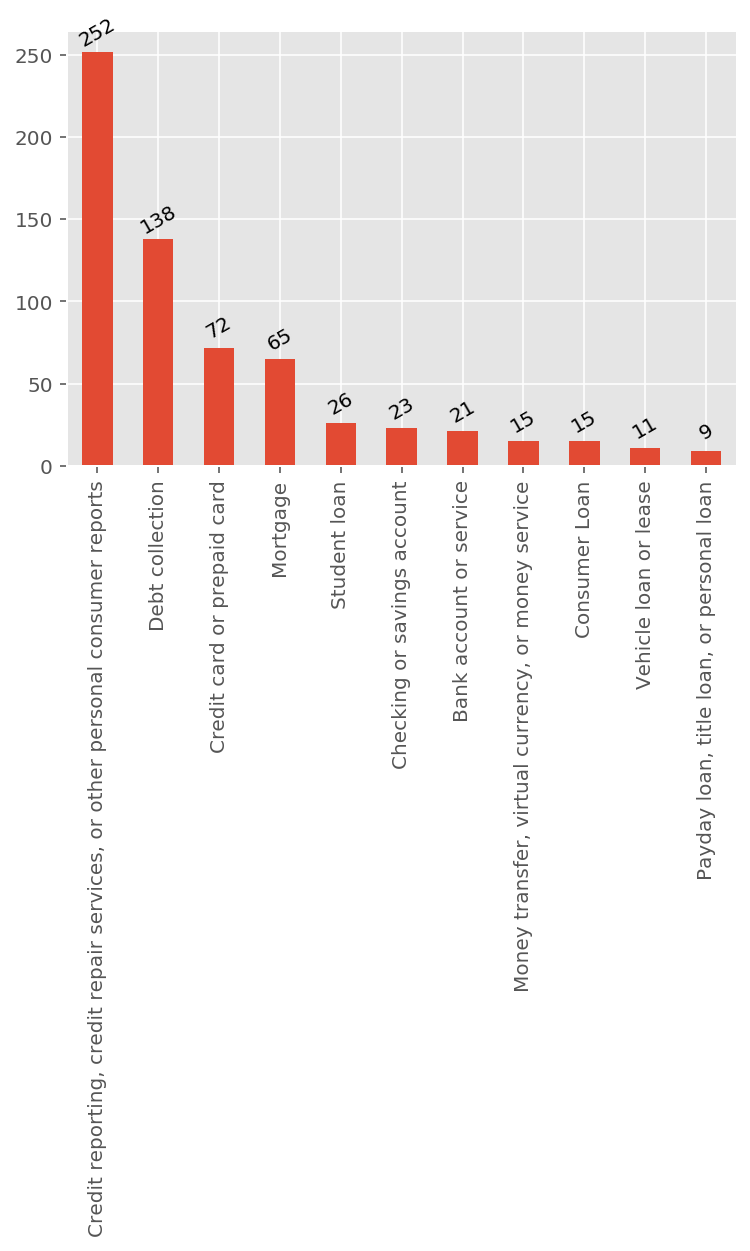

In [59]:
ax = df['product'].value_counts().plot.bar()
add_text_barplot(ax)
plt.savefig('../images/category_distribution.png',dpi=300)

In [56]:
df_id_to_product = pd.read_csv('../data/id_to_product.csv')
ser_id_to_product = df_id_to_product.iloc[:,0]
ser_id_to_product

0                                                                         Mortgage
1     Credit reporting, credit repair services, or other personal consumer reports
2                                        Payday loan, title loan, or personal loan
3                                                      Credit card or prepaid card
4                                                      Checking or savings account
5                                                            Vehicle loan or lease
6                                                                  Debt collection
7                               Money transfer, virtual currency, or money service
8                                                                     Student loan
9                                                          Bank account or service
10                                                                   Consumer Loan
Name: 0, dtype: object

In [46]:
dic_id_to_product = ser_id_to_product.to_dict()
dic_product_to_id = {v:k for k,v in dic_id_to_product.items()}

dic_product_to_id

{'Mortgage': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 1,
 'Payday loan, title loan, or personal loan': 2,
 'Credit card or prepaid card': 3,
 'Checking or savings account': 4,
 'Vehicle loan or lease': 5,
 'Debt collection': 6,
 'Money transfer, virtual currency, or money service': 7,
 'Student loan': 8,
 'Bank account or service': 9,
 'Consumer Loan': 10}

# EDA for Text Data

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# help(TfidfVectorizer())

In [48]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
tfidf

TfidfVectorizer(min_df=5, ngram_range=(1, 2), stop_words='english',
                sublinear_tf=True)

In [49]:
# transform each complaint into a vector
features = tfidf.fit_transform(df['complaint_clean']).toarray()

labels = df['category_id']

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 647 complaints is represented by 2023 features (TF-IDF score of unigrams and bigrams)


In [52]:
from sklearn.feature_selection import chi2
from tqdm import tqdm

def get_top_N_correlated(N=4):
    products,top_uni,top_bi = [],[],[]
    for product, category_id in sorted(dic_product_to_id.items()):
        features_chi2 = chi2(features, labels == category_id)
        indices = np.argsort(features_chi2[0])
        feature_names = np.array(tfidf.get_feature_names())[indices]
        unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
        bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
        products.append(product)
        top_uni.append(', '.join(unigrams[-N:]))
        top_bi.append(', '.join(bigrams[-N:]))

    df_top_corr = pd.DataFrame({'product': products,
                                'unigram': top_uni,
                                'bigram': top_bi})
    
    return df_top_corr

df_top_corr = get_top_N_correlated(N=4)
df_top_corr.style.set_caption('Top Correlated Terms per Category')

,product,unigram,bigram
0,Bank account or service,"estate, bank, deposited, overdraft","told check, money acount, closing acount, fund acount"
1,Checking or savings account,"coming, checking, bonus, debit","day acount, checking acount, fraud claim, debit card"
2,Consumer Loan,"aproval, finance, husband, instalment","paid xx, xx financial, xx payment, ben paid"
3,Credit card or prepaid card,"visa, reward, purchase, card","purchase xx, received statement, american expres, credit card"
4,"Credit reporting, credit repair services, or other personal consumer reports","report, experian, acounts, equifax","reporting agency, credit reporting, trans union, credit report"
5,Debt collection,"portfolio, colector, colection, debt","debt colection, debt owe, portfolio recovery, debt colector"
6,"Money transfer, virtual currency, or money service","reply, scamed, transfer, fund","fund acount, check xx, xx bank, acount day"
7,Mortgage,"apraisal, escrow, modification, mortgage","short sale, mortgage payment, loan modification, mortgage company"
8,"Payday loan, title loan, or personal loan","loan, los, internet, source","month al, pa xx, xx pa, report report"
9,Student loan,"loan, deferment, student, navient","payment loan, payment plan, pay loan, student loan"


# Total Time Taken

In [51]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 0 min 1 secs
